# Descripción del proyecto

## Contexto

Has decidido abrir un pequeño café regentado por robots en Los Ángeles. El proyecto es prometedor pero caro, así que tú y tus compañeros decidís intentar atraer inversionistas. Están interesados en las condiciones actuales del mercado, ¿serás capaz de mantener tu éxito cuando la novedad de los camareros robot desaparezca?

Eres un gurú del análisis así que te han pedido que prepares un estudio de mercado. Tienes datos procedentes de fuentes abiertas sobre restaurantes en LA.

## Instrucciones para completar el proyecto

### **Paso 1.** Descarga los datos y prepáralos para el análisis

Descarga los datos de los restaurantes en LA. Asegúrate de que el tipo de datos para cada columna es correcto y que no hay valores ausentes o duplicados. Procésalos si es necesario.

### **Paso 2.** Análisis de datos

 * Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.
 * Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.
 * ¿Qué tipo de establecimiento es habitualmente una cadena?
 * ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?
 * Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.
 * Coloca los datos de los nombres de las calles de la columna `address` en una columna separada.
 * Traza un gráfico de las diez mejores calles por número de restaurantes.
 * Encuentra el número de calles que solo tienen un restaurante.
 * Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

Llega a una conclusión y aporta recomendaciones sobre el tipo de restaurante y el número de asientos. Comenta la posibilidad de desarrollar una cadena.

### **Paso 3.** Preparar una presentación

Prepara una presentación de tu investigación para compartir con el grupo de inversionistas. Puedes utilizar cualquier herramienta para crearla pero debes convertir tu presentación a formato **PDF** para la evaluación. Incluye un enlace a la presentación en una celda markdown en el siguiente formato:

<div style="background-color: #f0f0f0; border: 1px solid #ddd; padding: 30px; border-radius: 5px; color: #000000; width: 500px; height:30px; display: flex; align-items: center; justify-content: center;">
Presentation: &lt;enlace al almacenamiento en la nube&gt;
</div>



Sigue las directrices de formato del capítulo *"Preparar presentaciones"*.

**Formato:** Completa el ejercicio en un Jupyter notebook. Inserta el código en las celdas *code* y las explicaciones de texto en las celdas *markdown*. Aplica formato y encabezados.

## Descripción de datos

Tabla `rest_data:`

 * *object_name* — nombre del establecimiento
 * *chain* — establecimiento que pertenece a una cadena (TRUE/FALSE)
 * *object_type* — tipo de establecimiento
 * *address* — dirección
 * *number* — número de asientos

# **Paso 1.** Descarga los datos y prepáralos para el análisis

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Leer el archivo
rest = pd.read_csv('/datasets/rest_data_us_upd.csv')

In [4]:
# Mostrar las primeras 5 filas
rest.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [5]:
# Mostrar la informacion del DataFrame
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


 * El DataFrame contiene *9651* filas.
 * La columna `object_name`, `object_type` y `number` no tienen un nombre descriptivo.
 * La columna `chain` al parecer tiene **3** valores ausentes.
 * Los tipos de datos son correctos aunque podemos cambiar el tipo de datos de la columna `object_type` a *category*.

In [6]:
# Cambiar nombres de las columnas
rest.columns = ['id', 'name', 'adress', 'chain', 'type', 'seats']

In [7]:
# 
rest['id'] = rest['id'].astype('uint64')
rest['type'] = rest['type'].astype('category')


In [8]:
# Mostrar la descripcion del DataFrame incluyendo las columnas categoricas
rest.describe(include='all')

,id,name,adress,chain,type,seats
count,9651.000000,9651,9651,9648,9651,9651.000000
unique,NaN,8672,8512,2,6,NaN
top,NaN,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant,NaN
freq,NaN,47,11,5972,7255,NaN
mean,16611.000000,NaN,NaN,NaN,NaN,43.695161
std,2786.148058,NaN,NaN,NaN,NaN,47.622874
min,11786.000000,NaN,NaN,NaN,NaN,1.000000
25%,14198.500000,NaN,NaN,NaN,NaN,14.000000
50%,16611.000000,NaN,NaN,NaN,NaN,27.000000
75%,19023.500000,NaN,NaN,NaN,NaN,46.000000


1. **Distribución de Nombres y Direcciones**

   Aunque hay muchos nombres y direcciones únicos, algunos nombres y direcciones se repiten con frecuencia. Puede ser útil investigar si estos casos repetidos corresponden a ubicaciones de cadenas o si hay errores en los datos.

2. **Prevalencia de Cadenas**

   La mayoría de los establecimientos no pertenecen a una cadena. Esto podría reflejar un enfoque en negocios independientes o locales en el conjunto de datos.

3. **Diversidad de Tipos de Establecimientos**

   La diversidad de tipos de establecimientos indica un rango amplio de negocios en el DataFrame, con `Restaurant` siendo el más común.

4. **Variación en la Capacidad de Asientos**

   La amplia gama en la capacidad de asientos sugiere una variabilidad en el tamaño y la escala de los establecimientos. Es importante considerar esta variabilidad al realizar análisis que dependen del tamaño de los establecimientos.

5. **Valores Nulos en `chain`**

   La presencia de valores nulos en la columna `chain` puede requerir limpieza o imputación de datos, dependiendo de cómo se utilizará esta información en el análisis.

6. **Exploración Adicional**

   Sería útil realizar una limpieza de datos adicional para manejar valores nulos, validar direcciones repetidas y verificar la consistencia en los nombres y tipos de establecimientos.


### Buscar valores duplicados

In [9]:
# Buscar valores duplicados
print('Duplicados:', rest.duplicated().sum())

Duplicados: 0


### Tratar los valores ausentes en la columna *chain*

In [10]:
# Mostrar las filas con valores nulos en la columna chain
rest[rest['chain'].isnull()]

,id,name,adress,chain,type,seats
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


Mostramos las 3 filas que contienen los valores nulos en chain, se me ocurren 2 maneras de tratar estos valores debido a que son pocos podemos:

1. Eliminarlos ya que no nos afectara en nuestro analisis
2. Revisar si el `name` se repite para revisar si pertenecen a una cadena o no pertenecen.

Tomaremos la opcion 2 por lo que analizaremos si pertenecen a una cadena o no.

In [11]:
# Mostrat el numero de veces que aparece cada valor
rest[rest['name'].isin(["TAQUERIA LOS 3 CARNALES", "JAMMIN JIMMY'S PIZZA", "THE LEXINGTON THEATER"])].count()

id        3
name      3
adress    3
chain     0
type      3
seats     3
dtype: int64

El `name` de cada valor es unico, por lo que podemos deducir que no pertenecen a ninguna cadena por lo que podemos llenar los valores ausentes con *False*

In [12]:
# Llenar valores ausentes en la columna chain con 'False'
rest['chain'].fillna(False, inplace=True)

In [13]:
# Verificar que no haya columnas con valores nulos
rest.isnull().sum()

id        0
name      0
adress    0
chain     0
type      0
seats     0
dtype: int64

In [14]:
# Mostrar la informacion del DataFrame
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      9651 non-null   uint64  
 1   name    9651 non-null   object  
 2   adress  9651 non-null   object  
 3   chain   9651 non-null   bool    
 4   type    9651 non-null   category
 5   seats   9651 non-null   int64   
dtypes: bool(1), category(1), int64(1), object(2), uint64(1)
memory usage: 320.8+ KB


### Buscar valores duplicados implicitos

In [15]:
# Buscar valores duplicados por 'name' y 'adress'
print('Duplicados implicitos:', rest[['name', 'adress']].duplicated().sum())

# Mostrar duplicados encontrados
rest[rest[['name', 'adress']].duplicated(keep=False)]

Duplicados implicitos: 1


,id,name,adress,chain,type,seats
73,11859,BLD,700 WORLD WAY 7C,True,Restaurant,21
7115,18901,BLD,700 WORLD WAY 7C,True,Restaurant,26


Al buscar valores duplicados implicitos encontramos que los dos Restaurantes de la cadena *BLD* se encuentran en el mismo domicilio pero ambos tienen diferente numero de asientos y de id, como analista busque la direccion y pude ver que la direccion pertenece al Aeropuerto de los Angeles. Con este analisis podemos decir que no son duplicados ya que pueden tener la misma direccion pero se enceuntran en locales separados.

Haremos un segundo analisis en los duplicados implicitos ya que no estoy seguro de que realmente el restaurante *BLD* que se encuentra en el aeropuerto no sea un duplicado por lo que removeremos los caracteres especiales de la columna `name` y pondremos todd en mayusculas y finalmente realizaremos el mismo proceso.

In [16]:
# Remover caracteres especiales de name
rest['name'] = rest['name'].str.replace(r'[^\w\s]', '', regex=True)
rest['name'] = rest['name'].str.upper()
rest.head()

,id,name,adress,chain,type,seats
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLYS,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [17]:
# Buscar nuevamente duplicados por 'name' y 'adress'
print('Duplicados implicitos:', rest[['name', 'adress']].duplicated().sum())

# Mostrar duplicados encontrados
rest[rest[['name', 'adress']].duplicated(keep=False)].sort_values('name')

Duplicados implicitos: 20


,id,name,adress,chain,type,seats
2308,14094,23RD ST CAFE,936 W 23RD ST,False,Restaurant,32
7454,19240,23RD ST CAFE,936 W 23RD ST,False,Restaurant,35
3561,15347,5 STAR MARKET,2700 W VERNON AVE,False,Restaurant,28
7063,18849,5 STAR MARKET,2700 W VERNON AVE,False,Restaurant,1
73,11859,BLD,700 WORLD WAY 7C,True,Restaurant,21
7115,18901,BLD,700 WORLD WAY 7C,True,Restaurant,26
161,11947,CARLS JR 212,1751 S SOTO ST,False,Restaurant,140
4984,16770,CARLS JR 212,1751 S SOTO ST,True,Restaurant,106
535,12321,CARLS JR 321,2912 S FIGUEROA ST,False,Restaurant,108
7448,19234,CARLS JR 321,2912 S FIGUEROA ST,True,Restaurant,127


Ahora si podemos ver que algunos nombres estaban escritos erroneamente y encontramos *__20__* duplicados implicitos, ahora si sabemos que son duplicados por las direcciones, y algunos datos son erroneos, por ejemplo hay restaurantes de cadena que en su duplicado difiere la informacion ya que uno tiene *False* y el otro *True*, ahora debemos ver si tienen algun patron para saber que duplicado borrar.

In [18]:
# Crear variable para identificar duplicados
duplicated_mask = rest[['name', 'adress']].duplicated(keep=False)
duplicates = rest[duplicated_mask]

# Resolver duplicados
def resolve_duplicates(group):
    if group['chain'].sum() == len(group):
        # Si todos son 'True' en 'chain', mantener el último de acuerdo al índice
        return group.iloc[-1:]
    elif group['chain'].sum() > 0:
        # Si hay al menos un 'True' en 'chain', mantener solo los 'True'
        return group[group['chain']]
    else:
        # Si todos son 'False', mantener el último de acuerdo al índice
        return group.iloc[-1:]
    
# Aplicar la función a los duplicados
resolve_duplicates = duplicates.groupby(['name', 'adress']).apply(resolve_duplicates).reset_index(drop=True)

# Concatenar los duplicados resueltos con los no duplicados
rest_cleaned = pd.concat([rest[~duplicated_mask], resolve_duplicates]).reset_index(drop=True)
rest = rest_cleaned

# Verificar que no haya duplicados
print('Duplicados implicitos:', rest[['name', 'adress']].duplicated().sum())

Duplicados implicitos: 0


C:\Users\aleza\AppData\Local\Temp\ipykernel_7664\907016647.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resolve_duplicates = duplicates.groupby(['name', 'adress']).apply(resolve_duplicates).reset_index(drop=True)


Para los duplicado implicitos que encontramos, no observamos un patron evidente, por lo que hice una funcion que hiciera lo siguiente:

 * Para los duplicados que tuvieran en `chain` *True y True* eliminara el primero de acuerdo al indice.
 * Para los que tuvieran *True y False* en `chain` eliminara el Fasle ya que observe que todos eran restaurantes de cadenas famosas.
 * Para los que tuvieran *False y Fasle* en la columna `chain` tomara el mismo criterio que True y True.

### Conclusion

Podemos ver que en la tabla no habia duplicados explicitos, por lo que tuvios que buscar los duplicados implicitos a traves de las columnas `name` y `adress` y al inicio solo encontramos 3 los cuales decidi mantenerlos buscando si pertenecian a una cadena de restaurantes o eran independientes para asi no eliminarlos y mantener la integridad de la tabla.

Despues decidi hacer un segundo analisis dandole un orden general al nombre de cada restaurante, con expresiones regulares quitamos los apostrofes y puse todo en mayusculas; de esta manera encontramos 20 duplicados, pudimos eliminarlos pero nuevamente decidi mantener la integridad de la tabla por lo que de igual manera hice un analisis para determinar la mejor manera de arreglar y elimine los duplicados segun algunos criterios en una funcion.

# **Paso 2.** Análisis de datos

## Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.

In [19]:
# Contar valores unicos en la columna 'type'
type_counts = rest['type'].value_counts()
type_counts.columns = ['type', 'n_types']
type_counts.sort_values(inplace=True)
type_counts

type
Bakery         283
Bar            292
Pizza          315
Cafe           434
Fast Food     1065
Restaurant    7242
Name: count, dtype: int64

C:\Users\aleza\AppData\Local\Temp\ipykernel_7664\1173423639.py:10: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=type_counts.index, y=type_counts.values, palette=colors)
C:\Users\aleza\AppData\Local\Temp\ipykernel_7664\1173423639.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


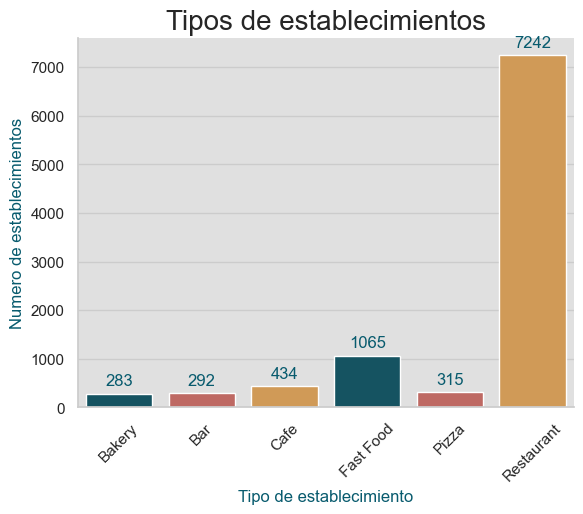

In [20]:
# Configurar el tamaño de la figura y el estilo
sns.set_context("talk", rc={"figure.figsize": (12, 6)})
sns.set_theme(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de barras
colors = ['#085B6E', '#CD5C54', '#E49C43']
ax = sns.barplot(x=type_counts.index, y=type_counts.values, palette=colors)
ax.set_facecolor('#e0e0e0')
ax.set_title('Tipos de establecimientos', fontsize=20)
ax.set_ylabel('Numero de establecimientos', color='#085B6E')
ax.set_xlabel('Tipo de establecimiento', color='#085B6E')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
#ax.tick_params(axis='x', colors='#CD5C54')
#ax.tick_params(axis='y', colors='#CD5C54')

# Mostrar los valores en cada barra
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                color='#085B6E')


# Mostrar la gráfica
sns.despine()

In [21]:
# Crear la gráfica de pastel
fig = px.pie(values=type_counts.values,
             names=type_counts.index,
             title='Proporciones de Tipos de Establecimientos', 
             labels={'index': 'Tipo de restaurante', 'values': 'Numero de restaurantes'},
             width=800,
             height=500,
             color_discrete_sequence=['#085B6E', '#69CD90', '#EDD461', '#E49C43', '#CD5C54']
)
fig.update_layout(title_x=0.5)

# Mostrar la gráfica
fig.show()

### Conclusion

Los `Restaurantes` son los mas populares con un *__75.2%__* y las `Panaderias` son las menos populares con un *__2.94%__*. Podemos observar que hay bastante competencia si se desea abrir un `Restaurante`.

## Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.

In [22]:
rest_chain = (rest.groupby('chain', as_index=False).agg({'id': 'count'}))
rest_chain.columns = ['chain', 'n_restaurants']
rest_chain['chain'] = rest_chain['chain'].replace({True: 'Cadena', False: 'Independiente'})
rest_chain

,chain,n_restaurants
0,Independiente,5962
1,Cadena,3669


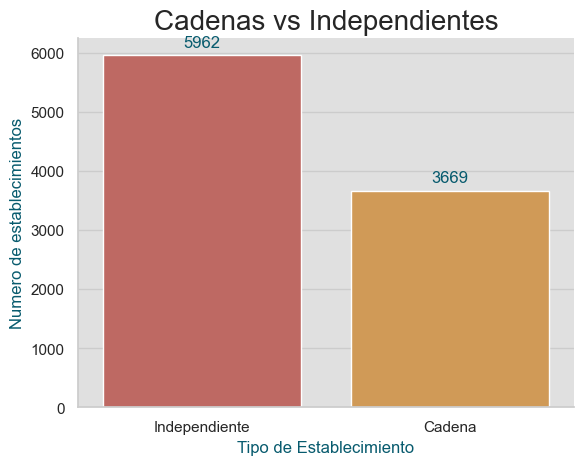

In [23]:
# Graficar el numero de restaurantes por cadena e independientes
sns.set_context("talk", rc={"figure.figsize": (10, 6)})
sns.set_theme(style="whitegrid")

colors = ['#CD5C54', '#E49C43']
ax = sns.barplot(x=rest_chain['chain'], y=rest_chain['n_restaurants'], palette=colors)
ax.set_facecolor('#e0e0e0')
ax.set_title('Cadenas vs Independientes', fontsize=20)
ax.set_ylabel('Numero de establecimientos', color='#085B6E')
ax.set_xlabel('Tipo de Establecimiento', color='#085B6E')

# Mostrar los valores en cada barra
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                color='#085B6E')

sns.despine()

In [24]:
# Graficar la cantidad de restaurantes por cadena
fig = px.pie(rest_chain,
             values='n_restaurants',
             names='chain',
             title='Proporción de Tipos de Establecimientos',
             width=800, height=500,
             color_discrete_sequence=['#CD5C54', '#E49C43']
)

fig.update_layout(title_x=0.5)
fig.show()

### Conclusion

Se analizo la proporcion de los restaurantes de cadena e independientes y se llego a la conclusion de que los restaurantes de cadena son menos teniendo un **_38.1%_** de estableciientos en comparacion de los independientes los cuales acaparan el mercado en un **__61.9%__**. La diferencia es de **__23.8__**, bastante grande

## ¿Qué tipo de establecimiento es habitualmente una cadena?

In [25]:
# Crear una funcion para crear un grafico para cada tipo de restaurante
def plot_seats_distribution(df, chain):
    # Filtrar los datos
    data = df[df['chain'] == chain]
    data = data['type'].value_counts().reset_index()
    data.columns = ['type', 'count']
    print(data)
    
    # Crear la gráfica de barras
    sns.set_context("notebook", rc={"figure.figsize": (10, 6)})
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x='type', y='count', data=data)
    ax.set_title(f'Distribución de tipos de restaurantes en {chain}')
    ax.set_ylabel('Número de restaurantes')
    ax.set_xlabel('Tipo de restaurante')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Mostrar la gráfica
    sns.despine()
    plt.show()


         type  count
0  Restaurant   2290
1   Fast Food    605
2      Bakery    283
3        Cafe    266
4       Pizza    148
5         Bar     77


C:\Users\aleza\AppData\Local\Temp\ipykernel_7664\2031987284.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



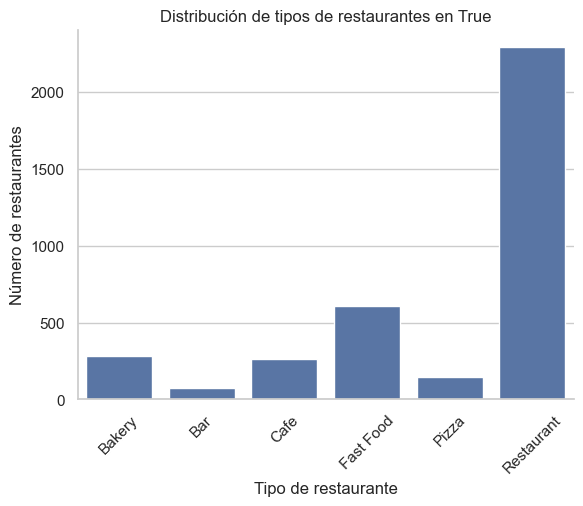

In [26]:
# Crear la gráfica de caja para establecimientos independientes
plot_seats_distribution(rest, True)

C:\Users\aleza\AppData\Local\Temp\ipykernel_7664\2031987284.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



         type  count
0  Restaurant   4952
1   Fast Food    460
2         Bar    215
3        Cafe    168
4       Pizza    167
5      Bakery      0


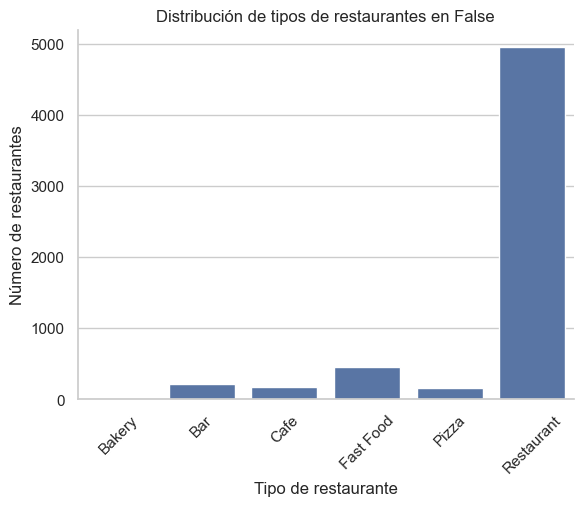

In [27]:
# Crear la gráfica de caja para estabelecimientos independientes
plot_seats_distribution(rest, False)

### Conclusion

 - Tenemos *__5962__* locales que no pertenecen a una cadena y *__3669__* que pertenecen a una cadena. Son mas locales independientes en nuestros datos.
 - En la cadenas el numero de `Restaurantes` es de *__2290__*.
 - En los independientes el numero de `Restaurantes` es de *__4952__*.

Podemos decir que los restaurantes de cadena no son tantos como pensaba; son mas los locales de propietarios independientes con una diferencia bastante grande de *__2293__*

En el analisis podemos decir los `Restaurantes` son los negocios de comida que mas puedes encontrar tanto en cadenas coo en negocios independientes. 
Los demas tipos de negocio hay un mayor numero en las cadenas en comparacion de los independientes.

Las `Panaderias` no existen entre los locatarios independientes y en las cadenas hay *__283__*.    
Los `Bares` son muy pocos entre las cadenas habiendo tan solo *__77__* en comparacion de los `Bares` independientes que son mas habiendo *__215__*.

En este caso podemos decir que los tipos de negocio si difieren si son de cadena o independientes.

## ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

In [28]:
# DataFrame que pertece a una cadena
chain_rest = rest[rest['chain'] == True]
# DataFrame que no pertece a una cadena
not_chain_rest = rest[rest['chain'] == False]

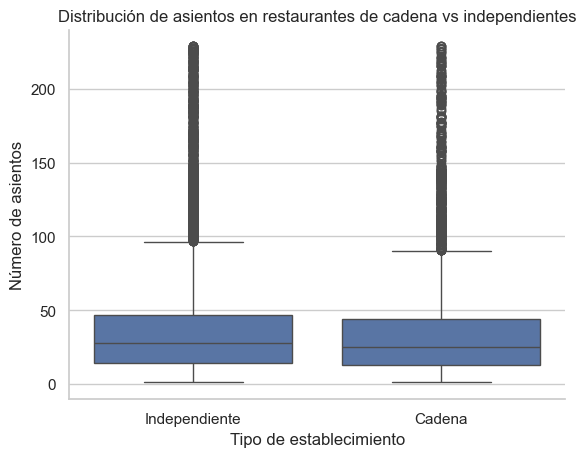

In [29]:
# Distribución de asientos entre restaurantes de cadena e independientes
sns.set_context("talk", rc={"figure.figsize": (12, 6)})
sns.set_theme(style="whitegrid")
rest_temp = rest.copy()
rest_temp['chain'] = rest_temp['chain'].replace({True: 'Cadena', False: 'Independiente'})
ax = sns.boxplot(x='chain', y='seats', data=rest_temp)
ax.set_title('Distribución de asientos en restaurantes de cadena vs independientes')
ax.set_ylabel('Número de asientos')
ax.set_xlabel('Tipo de establecimiento')

# Mostrar la gráfica
sns.despine()
plt.show()

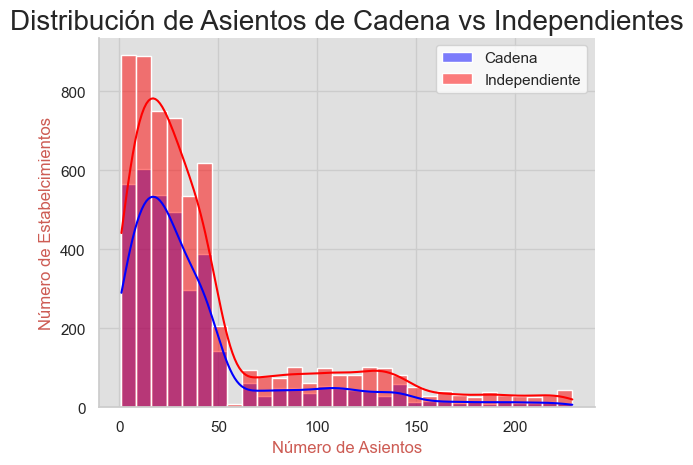

In [30]:
# Distribución de asientos entre restaurantes de cadena e independientes
sns.set_context("talk", rc={"figure.figsize": (12, 6)})
sns.set_theme(style="whitegrid")
ax = sns.histplot(data=chain_rest['seats'], bins=30, color='blue', kde=True, label='Cadena', alpha=0.5)
ax = sns.histplot(data=not_chain_rest['seats'], bins=30, color='red', kde=True, label='Independiente', alpha=0.5)
ax.set_facecolor('#e0e0e0')

# Configurar el título y las etiquetas
ax.set_title('Distribución de Asientos de Cadena vs Independientes', fontsize=20)
ax.set_ylabel('Número de Estabelcimientos', color='#CD5C54')
ax.set_xlabel('Número de Asientos', color='#CD5C54')

# Mostrar la gráfica
sns.despine()
plt.legend()
plt.show()

In [31]:
# Media de asientos entre establecimientos de cadena e independientes
fig = px.pie(values=[chain_rest['seats'].mean(), not_chain_rest['seats'].mean()],
             names=['Cadena', 'Independiente'],
             title='Media de Asientos de Cadena vs Independientes',
             labels={'index': 'Cadena de establecimientos', 'values': 'Número de asientos'},
             width=800,
             height=500,
             color_discrete_sequence=['#CD5C54', '#E49C43']
)
fig.update_layout(title_x=0.5)
fig.show()


### Conclusion

Para responder a nuestra pregunta y saber que caracteriza a los establecimientos de cadena, debemos comprarlos con los establecimientos independientes.

Con los graficos llegamos a la conclusion de que los establecimientos de cadena tienen menos asientos que los independientes y con las conclusiones anteriores tambien sabemos que hay menos estableciientos pertenecientes a una cadena por lo que podemos decir que los restaurantes de cdena son pocs establecimientos con un menor numero de asientos.

## Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.

In [32]:
# Media de asientos por tipo de establecimiento en restaurantes de cadena e independientes
seats_mean = rest.groupby(['type', 'chain']).agg({'seats': 'mean'}).reset_index()
seats_mean = seats_mean.pivot(index='type', columns='chain', values='seats').reset_index()
seats_mean.columns = ['type', 'mean_seats_chain', 'mean_seats_not_chain']
seats_mean

,type,mean_seats_chain,mean_seats_not_chain
0,Bakery,NaN,21.773852
1,Bar,46.381395,40.259740
2,Cafe,23.410714,25.917293
3,Fast Food,23.591304,38.089256
4,Pizza,31.143713,25.844595
5,Restaurant,49.494952,44.884279


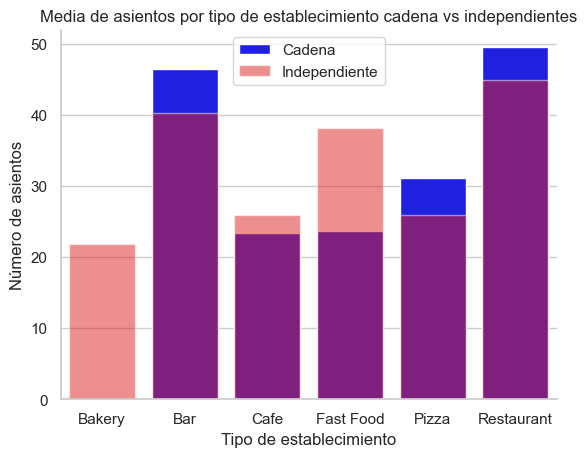

In [33]:
# Crear la gráfica de barras con la media de asientos por tipo de establecimiento
sns.set_context("talk", rc={"figure.figsize": (12, 6)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=seats_mean['type'], y=seats_mean['mean_seats_chain'], color='blue', label='Cadena')
ax = sns.barplot(x=seats_mean['type'], y=seats_mean['mean_seats_not_chain'], color='red', label='Independiente', alpha=0.5)
ax.set_title('Media de asientos por tipo de establecimiento cadena vs independientes')
ax.set_ylabel('Número de asientos')
ax.set_xlabel('Tipo de establecimiento')

# Mostrar la gráfica
sns.despine()
plt.legend()
plt.show()

In [34]:
rest_seats = rest.groupby('type').agg({'seats': 'mean'}).reset_index()
rest_seats.columns = ['type', 'mean_seats']
rest_seats

,type,mean_seats
0,Bakery,21.773852
1,Bar,44.767123
2,Cafe,24.947005
3,Fast Food,31.827230
4,Pizza,28.653968
5,Restaurant,48.037006


C:\Users\aleza\AppData\Local\Temp\ipykernel_7664\4037857596.py:10: UserWarning:


The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.

C:\Users\aleza\AppData\Local\Temp\ipykernel_7664\4037857596.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



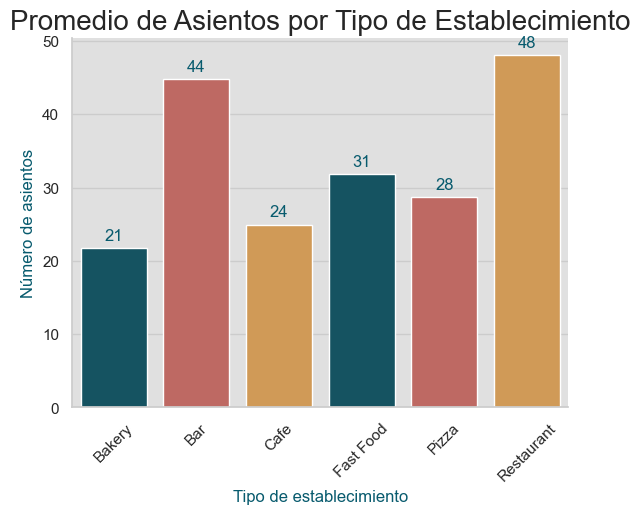

In [35]:
# Crear la gráfica de barras
sns.set_context("talk", rc={"figure.figsize": (12, 6)})
sns.set_theme(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de barras
colors = ['#085B6E', '#CD5C54', '#E49C43']
ax = sns.barplot(x=rest_seats['type'], y=rest_seats['mean_seats'], palette=colors)
ax.set_facecolor('#e0e0e0')

# Configurar el título y las etiquetas
ax.set_title('Promedio de Asientos por Tipo de Establecimiento', fontsize=20)
ax.set_ylabel('Número de asientos', color='#085B6E')
ax.set_xlabel('Tipo de establecimiento', color='#085B6E')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Mostrar los valores en cada barra
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                color='#085B6E')

# Mostrar la gráfica
sns.despine()
plt.show()

### Conclusion

Es evidente que los `Restaurantes` son los establecimientos que tienen un mayor promedio en nuemero de asientos, esto se debe a que los `Restaurantes` son los que dominan mas, seguido de los `Bares` que aunque no son tantos como los `Restaurantes` podemos decir que tienen un promedio alto por que esperan una mayor afluencia.

Nuestra conclusion se observa en las graficas tanto de manera global como por establecimientos de cadena e independientes.

## Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [36]:
# Separar la direccion
rest['street_number'] = rest['adress'].str.extract(r'^(\d+)')
rest['street_number'] = rest['street_number'].astype('str')
rest['street_name'] = rest['adress'].str.extract(r'^\d+\s(.+)$')
rest['street_name'] = rest['street_name'].str.upper()

# Eliminar la columna adress
rest.drop(columns='adress', inplace=True)
rest = rest[['id', 'name', 'street_number', 'street_name', 'chain', 'type', 'seats']]
rest.head()


,id,name,street_number,street_name,chain,type,seats
0,11786,HABITAT COFFEE SHOP,3708,N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLYS,100,WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801,HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814,W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100,ECHO PARK AVE,False,Restaurant,20


### Conclusion

Para hacr la separacion se llego a la conclusion de que primero va el numero del establecimeinto y despues viene el nombre de la calle; podemos ver que hay calles con algunos numeros despues pero esto pertenece al nombre de la calle, como ejemplo podemos poner `WORLD WAY 120` el cual el `120` pertenece al nombre.

Para separa el numero y nombre de calle se utilizaron los siguientes criterios:

 - Para el numero:
     * `^(\d+)` Esta espresion regular coincide con una o más cifras al principio de una línea y captura esas cifras en un grupo.

 - Para el nombre de la calle
     * `^\d+\s(.+)$` Esta expresion regular coincide con una línea que comienza con uno o más dígitos, seguidos por un espacio, y luego cualquier secuencia de caracteres hasta el final de la línea. Captura la secuencia de caracteres después del espacio en un grupo.

## Traza un gráfico de las diez mejores calles por número de restaurantes.

In [37]:
# Guardar en una variable las 10 calles con mas restaurantes
top_streets = rest['street_name'].value_counts().head(10)
top_streets

street_name
W SUNSET BLVD        296
W PICO BLVD          288
HOLLYWOOD BLVD       168
WILSHIRE BLVD        161
S VERMONT AVE        148
W 3RD ST             145
SANTA MONICA BLVD    145
BEVERLY BLVD         135
S FIGUEROA ST        133
S WESTERN AVE        128
Name: count, dtype: int64

C:\Users\aleza\AppData\Local\Temp\ipykernel_7664\2839946088.py:10: UserWarning:


The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.

C:\Users\aleza\AppData\Local\Temp\ipykernel_7664\2839946088.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



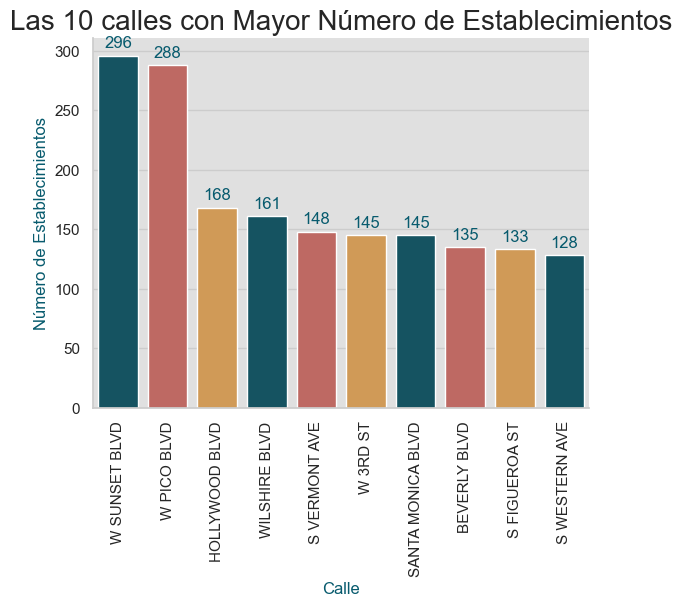

In [38]:
# Graficar las 10 calles con más restaurantes
sns.set_context("talk", rc={"figure.figsize": (12, 6)})
sns.set_theme(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Crear la gráfica de barras
colors = ['#085B6E', '#CD5C54', '#E49C43']
ax = sns.barplot(x=top_streets.index, y=top_streets.values, palette=colors)
ax.set_facecolor('#e0e0e0')
ax.set_title('Las 10 calles con Mayor Número de Establecimientos', fontsize=20)
ax.set_ylabel('Número de Establecimientos', color='#085B6E')
ax.set_xlabel('Calle', color='#085B6E')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Mostrar los valores en cada barra
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), 'd'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                color='#085B6E')

# Mostrar la gráfica
sns.despine()
plt.show()

In [39]:
# Grafica de pastel con las 10 calles con mas restaurantes
fig = px.pie(values=top_streets.values,
             names=top_streets.index,
             title='Proporción de establecimientos por calle (Top 10)',
             labels={'index': 'Calle', 'values': 'Número de restaurantes'},
             width=800,
             height=500,
             color_discrete_sequence=['#085B6E', '#69CD90', '#EDD461', '#E49C43', '#CD5C54']
)
fig.update_layout(title_x=0.5)
fig.show()

### Conclusion

Las calles con mas establecimientos son `W SUNSET BLVD` y `W PICO BLVD` los cuales podemos encontrar *296* y 288* respectivamente, una diferencia significativa con el **3er** lugar que le pertenece a `HOLLYWOOD BLVD` con *168* establecimientos.

## Encuentra el número de calles que solo tienen un restaurante.

In [40]:
# Mostrar las calles que solo tienen 1 restaurante
one_restaurant_streets = rest['street_name'].value_counts()
one_restaurant_streets = one_restaurant_streets[one_restaurant_streets == 1]
one_restaurant_streets

street_name
WORLD WAY T61               1
S WESTMORELAND AVE FLR 2    1
WALL ST STE 123             1
SANTA MONICA BLVD FC 15     1
FAIRFAX AVE 47              1
                           ..
W 6TH ST STE 104-5          1
WORLD WAY #4708             1
POMONA BLVD 101             1
WILSHIRE BLVD STE #1        1
BEVERLY BLVD STE 702        1
Name: count, Length: 2443, dtype: int64

In [41]:
# Mostrar el conteo de calles en rest
print('Número de calles:', rest['street_name'].nunique())

Número de calles: 3064


In [42]:
print('Hay {} calles con solo 1 establecimiento'.format(len(one_restaurant_streets)))

Hay 2443 calles con solo 1 establecimiento


### Conclusion

Podeos ver que la diferencia de establecimientos que comparten direccion es significativa habiendo tan solo *621* establecimientos. Y los establecimientos que se encuentran sin compartir direccion son mayores con *2443* establecimientos.

## Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

In [43]:
# Analizar la distribucion del numero de asientos de las calles con mas restaurantes
top_streets_seats = rest[rest['street_name'].isin(top_streets.index)]
top_streets_seats

,id,name,street_number,street_name,chain,type,seats
3,11789,TRINITI ECHO PARK,1814,W SUNSET BLVD,False,Restaurant,22
10,11796,EL POLLO LOCO,5319,W SUNSET BLVD,True,Restaurant,38
16,11802,HMS BOUNTY,3357,WILSHIRE BLVD,False,Restaurant,147
22,11808,CAMYS GRILL,3339,WILSHIRE BLVD,False,Restaurant,39
28,11814,BEVERLY FALAFEL,8508,W 3RD ST,False,Restaurant,31
...,...,...,...,...,...,...,...
9608,21434,JUICY WINGZ,6741,HOLLYWOOD BLVD,True,Fast Food,15
9615,19234,CARLS JR 321,2912,S FIGUEROA ST,True,Restaurant,127
9619,18997,DOMINOS PIZZA,3309,W PICO BLVD,True,Pizza,2
9621,20736,DOMINOS PIZZA 8113,12237,SANTA MONICA BLVD,True,Pizza,24


C:\Users\aleza\AppData\Local\Temp\ipykernel_7664\362020150.py:6: UserWarning:


The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.

C:\Users\aleza\AppData\Local\Temp\ipykernel_7664\362020150.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



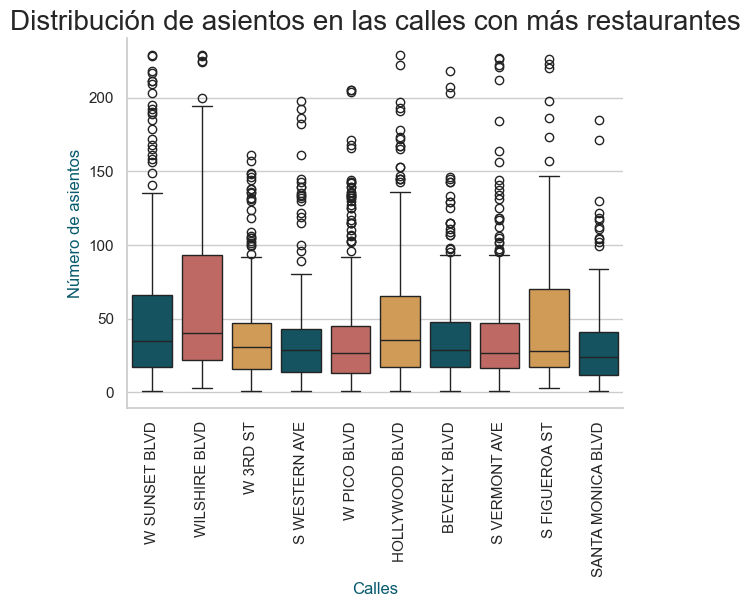

In [44]:
# Crear la gráfica de caja
sns.set_context("talk", rc={"figure.figsize": (12, 6)})
sns.set_theme(style="whitegrid")

colors = ['#085B6E', '#CD5C54', '#E49C43']
ax = sns.boxplot(x='street_name', y='seats', data=top_streets_seats, palette=colors)

# Configurar el título y las etiquetas
ax.set_title('Distribución de asientos en las calles con más restaurantes', fontsize=20)
ax.set_ylabel('Número de asientos', color='#085B6E')
ax.set_xlabel('Calles', color='#085B6E')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Mostrar la gráfica
sns.despine()
plt.show()

### Conclusion

 Como podemos ver, las calles más populares tienen una menor proporción de establecimientos con un pequeño número de asientos, lo cual se confirma en el gráfico. Así, hemos confirmado gráficamente los datos obtenidos previamente de que el número promedio de asientos en las calles más populares es mayor que en otras calles.

Quizás esto se deba al hecho de que hay más clientes en las calles populares y los restaurantes pueden recibir más clientes que los establecimientos en otras calles.

## Conclusion general

Después de analizar los establecimientos en Los Ángeles, descubrimos lo siguiente:

- Hay *9651* establecimientos en Los Ángeles.
- Más del *75%* de todos los establecimientos en la ciudad son restaurantes.
- El *38%* de los establecimientos son cadenas.

Abrir un establecimiento de cadena tiene una serie de ventajas:
- Costos reducidos para marketing, compras y salarios del personal de gestión.
- Menos riesgo al abrir, ya que existe un modelo de negocio exitoso y estable.
- En los establecimientos de cadena, el número de asientos es menor que en los independientes *(en promedio 46 frente a 54)*. Supongo que esto se debe a que hay muchos establecimientos de cadena, y los clientes de estos no vienen de toda la ciudad a un solo lugar, sino que visitan el establecimiento más cercano.
- Esto lleva a ahorros no solo en el personal de gestión, sino también en los costos de alquiler.
- El número promedio de asientos en un café es de *25*. El número promedio de asientos en un restaurante es de *48*.

Cualquiera que sea la calidad de la cocina o el concepto con el diseño perfecto, lamentablemente, esto no garantiza una buena asistencia para el restaurante. Un restaurante necesita tráfico, que depende en gran medida de la ubicación, por lo que la clave del éxito para la mayoría de los establecimientos es alquilar locales en calles con buen tráfico peatonal y vehicular. *Poca gente* = *No hay ganancia*.

## **Recomendaciones:**

- Tenemos un gran concepto para nuestro establecimiento. Esto atraerá a los clientes, incluidos los turistas, ya que el uso de robots en un restaurante es bastante raro. Estamos invirtiendo fuertemente en inversiones, por lo que recomendaría alquilar un lugar para un café en una calle con alto tráfico.
- Recomendaría considerar cambiar el tipo de establecimiento de café a restaurante. Dado que, en promedio, los restaurantes son más demandados por los clientes *(75% frente a 4.5%)*, los restaurantes tienen más asientos *(48 frente a 25)*.
- Si logramos lanzar con éxito nuestro establecimiento y el modelo de negocio, traera dinero de manera consistente, entonces el siguiente paso en el desarrollo de este negocio, propongo considerar la creación de una cadena de establecimientos, posiblemente la venta de una franquicia.


# **Paso 3.** Preparar una presentación

<div style="background-color: #f0f0f0; border: 1px solid #ddd; padding: 30px; border-radius: 5px; color: #000000; width: 500px; height:30px; display: flex; align-items: center; justify-content: center;">
    Presentation:&nbsp;<a href="https://drive.google.com/file/d/1-YBGqGHtw1CzAnxD0L65G5JvPSBmrU_4/view?usp=drive_link" target="_blank" style="color: blue;">Enlace a la presentación</a>
</div>